## Final Project Submission

Please fill out:
* Student name: Dirk Van Curan
* Student pace: Full time
* Scheduled project review date/time:  August 23, 2019 9:30 am
* Instructor name: Cristian
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [ ]:
"""This file contains some in progress code on our Mod 1 project.
In this project, we are given real estate sales data from King
County in Seattle, and we are asked to make a predictor for price."""

In [1]:
# import modules needed for data analysis and get them ready for use in the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [2]:
# import the given data and store it in a pandas DataFrame
raw_data = pd.read_csv("kc_house_data.csv")

## Initial exploration of what the data looks like

In [16]:
raw_data.shape

(21597, 21)

In [13]:
raw_data.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [12]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## Decided to use only the zipcodes of each sale as a initial model

In [25]:
# Convert the zipcodes to an array of One Hot values instead of a column of integers
# Zipcodes are not really useful as integers since they are actually categorical 
# values and being in a zipcode or not is more helpful for the model
ohe = OneHotEncoder(drop='first', categories='auto') 

In [ ]:
price_zip_trans = ohe.fit_transform(raw_data['zipcode'].values.reshape(-1,1))

In [ ]:
ohe.get_feature_names()

In [ ]:
# this takes the One Hot encoded array and makes a new sparse DataFrame
# the column names are the zipcodes and the values are Boolean 1s or 0s
# depending on if the sale happened in that zipcode
zip_sparce = pd.DataFrame(price_zip_trans.todense(), columns=ohe.get_feature_names())

In [ ]:
# adding the sale prices as a new column to the sparse array so that it can be
# used in a model
zip_sparce['price'] = raw_data['price']

In [ ]:
# initial examination of correlation between price and zipcode
zip_sparce.corr()['price'].sort_values(ascending=False)

In [ ]:
price_array = np.asarray(zip_sparce['price'])

price_array

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(24,3)})
sns.heatmap(zip_sparce.corr().loc[['price']],vmax=0.3);

## Begin doing linear regression

In [ ]:
# Choose our predictors for the model
X = zip_sparce.drop('price', axis=1)
y = zip_sparce['price']
X.info()

In [ ]:
# Initial rough model for exploration
predictors = sm.add_constant(X)
model = sm.OLS(y, predictors).fit()
model.summary()

## Try with improved modeling (not StatsModels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(zip_sparce.drop('price', axis=1), 
                                                    zip_sparce['price'],
                                                   random_state=42)

In [ ]:
# Let's create a StandardScaler object to scale our data for us.
ss = StandardScaler()

# Now we'll apply it to our data by using the .fit() and transform() methods.
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)


In [ ]:
# Now we can fit a LinearRegression object to our training data!

lr = LinearRegression()
lr.fit(X_train_sc, y_train)

In [ ]:
lr.score(X_test_sc, y_test)


In [ ]:
# We can use the .coef_ attribute to recover the results
# of the regression.

lr.coef_

In [ ]:
# And .intercept_

lr.intercept_

In [ ]:
X_train.columns

Erin suggested avoiding groupby to make a bunch of different dataframes. Instead, consider making "hybrid" columns that play with the data you are given to give another metric for the model to use.

Remember to clean the data as you go!

Think about the assumptions of the model you're using and if you need to transform your data

In [5]:
test = raw_data.groupby('zipcode')

In [11]:
test.reset_index()

AttributeError: Cannot access callable attribute 'reset_index' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [6]:
for name, group in test:
    print(name)
    print(group)

98001
               id        date     price  bedrooms  bathrooms  sqft_living  \
38     7895500070   2/13/2015  240000.0         4       1.00         1220   
67     3717000160   10/9/2014  287000.0         4       2.50         2240   
114    8961960160  10/28/2014  480000.0         4       2.50         3230   
213    4014400292   1/14/2015  465000.0         3       2.50         2714   
292    1115450240  10/22/2014  360000.0         4       2.50         2160   
322    3353400435   7/21/2014  230000.0         3       2.00         1450   
354    9262800171   3/24/2015  252000.0         4       1.50         1550   
440    3353401710   9/23/2014  227950.0         3       1.50         1670   
441    8159610030   7/22/2014  196000.0         3       2.25         2070   
641    3329500060   7/28/2014  305000.0         4       2.50         2250   
711    7967200060    9/8/2014  243000.0         3       1.75         1450   
739    8159610060  11/19/2014  233000.0         3       2.00         1

               id        date      price  bedrooms  bathrooms  sqft_living  \
10     1736800520    4/3/2015   662500.0         3       2.50         3560   
47     4178300310   7/16/2014   785000.0         4       2.50         2290   
871    4039300400   9/19/2014   469950.0         3       2.25         1620   
894     643500030  11/14/2014   431650.0         5       2.50         1710   
1011    865100055   6/12/2014   900000.0         4       2.25         2460   
1104   7374600060    1/9/2015   550000.0         3       2.00         1810   
1141    643500060   4/24/2015   620000.0         4       2.00         1770   
1442   6137500320   6/25/2014  1230000.0         4       3.50         3770   
1473   1562100030   9/10/2014   515000.0         4       1.75         1730   
1492   2207200520   9/29/2014   425000.0         3       1.00          970   
1525   7923500060   9/22/2014   713000.0         5       2.75         2580   
1596   2159900060   1/13/2015   451101.0         2       1.50   

               id        date     price  bedrooms  bathrooms  sqft_living  \
46     8945200830   3/25/2015  210490.0         3       1.00          990   
90     2791500270   5/22/2014  243500.0         4       2.50         1980   
92     4168000060   2/26/2015  153000.0         3       1.00         1200   
97     1099611230   9/12/2014  199000.0         4       1.50         1160   
127    8732020310   7/17/2014  260000.0         4       2.25         2160   
157    8731900200    8/7/2014  320000.0         4       2.75         2640   
171    9542800700    1/2/2015  272000.0         3       1.75         2160   
186    8731951370   4/15/2015  269000.0         4       1.75         1490   
195    7796450200   5/15/2014  256883.0         3       2.50         1690   
203     100600550    8/4/2014  226500.0         3       1.50         1300   
227    7972000200   5/29/2014  264950.0         4       2.25         1720   
232    9264902050  11/21/2014  315000.0         6       2.75         2940   

               id        date     price  bedrooms  bathrooms  sqft_living  \
23     8091400200   5/16/2014  252700.0         2       1.50         1070   
24     3814700200  11/20/2014  329000.0         3       2.25         2450   
180    3830630310   7/25/2014  260000.0         3       2.50         1670   
223    1922059282   9/18/2014  325000.0         3       2.25         2220   
254    3830630060   9/29/2014  245000.0         3       2.50         1730   
285    1509500060    9/5/2014  370000.0         4       2.50         2720   
348     808000070  10/21/2014  206600.0         3       2.00         1390   
516    1922059046  10/29/2014  308000.0         3       1.00         1980   
695    7697870860   6/25/2014  245000.0         3       2.00         1410   
734     731500200   1/13/2015  347500.0         4       2.50         2156   
740    7830800339   7/28/2014  360000.0         4       2.50         2210   
817    1922059135   5/13/2015  250000.0         2       2.00         1130   

               id        date     price  bedrooms  bathrooms  sqft_living  \
96     3422049190   3/30/2015  247500.0         3       1.75         1960   
148    8075400570  10/30/2014  258000.0         5       2.00         2260   
250    3832710960   9/23/2014  260000.0         3       2.00         1810   
444    8857600960   8/19/2014  205000.0         3       1.00          940   
497    7806300030   9/17/2014  299000.0         3       2.75         3080   
542    1310900260  10/13/2014  318888.0         4       1.75         2320   
715    3832200070  12/22/2014  250000.0         4       1.75         1710   
838    6777800160   7/28/2014  285000.0         4       1.75         2510   
1255   3832711040   4/24/2015  321000.0         5       2.75         3030   
1460   1951500030    2/4/2015  140000.0         3       1.00         1090   
1607   3832310350  10/21/2014  229900.0         3       1.75         1100   
1619   1310500550  12/20/2014  248000.0         4       2.25         2320   

               id        date     price  bedrooms  bathrooms  sqft_living  \
9      3793500160   3/12/2015  323000.0         3       2.50         1890   
73     5416510140   7/10/2014  360000.0         4       2.50         2380   
80     5104520400   12/2/2014  390000.0         3       2.50         2350   
81     7437100340  12/22/2014  360000.0         4       2.50         1900   
98      722079104   7/11/2014  314000.0         3       1.75         1810   
112    2525310310   9/16/2014  272500.0         3       1.75         1540   
183    6661200320   7/23/2014  163500.0         2       1.50         1050   
199    1222069094  10/14/2014  385000.0         3       1.75         1350   
210    2310030510   4/22/2015  320000.0         4       2.25         1550   
224     705700390    9/3/2014  328000.0         3       2.25         2020   
278    2022069200    5/5/2015  455000.0         4       2.50         2210   
303    5104530560    4/1/2015  208633.0         3       2.50         2040   

               id        date      price  bedrooms  bathrooms  sqft_living  \
21     2524049179   8/26/2014  2000000.0         3       2.75         3050   
95     1483300570    9/8/2014   905000.0         4       2.50         3300   
192    2287000060   9/12/2014   799000.0         3       2.50         2140   
205    3456000310    8/4/2014   840000.0         4       1.75         2480   
216      46100204   2/21/2015  1510000.0         5       3.00         3300   
334     191100045    7/3/2014   940000.0         4       2.00         2490   
351    2757000030   9/22/2014   855000.0         4       2.75         2270   
385    8651600160  11/11/2014   799000.0         4       2.25         2510   
394    1923000030   7/28/2014  1120000.0         4       2.50         3840   
454    2287000030  10/14/2014   811000.0         3       1.75         1870   
550    4099500935   7/23/2014   705000.0         3       1.75         2180   
556    5486800070   6/20/2014  1950000.0         7       3.50   

               id        date      price  bedrooms  bathrooms  sqft_living  \
99     7338200240   5/16/2014   437500.0         3       2.50         2320   
252    1422300030    4/1/2015   415000.0         3       2.25         1510   
258    9407100800  11/24/2014   255000.0         3       1.00         1230   
365     723099065   1/30/2015   465000.0         3       2.00         1840   
403    1151100070   2/24/2015   437000.0         3       2.50         1750   
585     192460060   7/15/2014   330000.0         3       1.75         1510   
597    7846200070   10/2/2014   595000.0         3       2.50         3370   
618    9407110700   1/13/2015   175000.0         3       1.00         1250   
660     192460310   3/24/2015   269900.0         3       1.75         1140   
676    7846700310   6/23/2014   280000.0         2       1.00         1010   
731    2723089104   9/17/2014   315000.0         3       2.25         1540   
947    7708300140    3/6/2015   369950.0         3       1.00   

               id        date      price  bedrooms  bathrooms  sqft_living  \
5      7237550310   5/12/2014  1230000.0         4       4.50         5420   
42     7203220400    7/7/2014   861990.0         5       2.75         3595   
226    8682281200    3/9/2015   479950.0         2       2.00         1510   
229    7202340400    3/3/2015   516500.0         3       2.50         1480   
283    7202360350   6/30/2014   780000.0         4       2.50         3500   
360    3211290370    6/5/2014   463000.0         3       2.50         1640   
512    7322910030   7/21/2014  1100000.0         5       3.50         4410   
526    7202331420   6/20/2014   650000.0         4       2.50         3040   
565    7203102050   7/28/2014   435000.0         3       2.50         1840   
590    2525069041    9/4/2014   505000.0         3       1.50         1830   
600    8682250350   10/9/2014   507000.0         2       1.75         1670   
681    3526069070   5/28/2014   799000.0         4       3.00   

               id        date      price  bedrooms  bathrooms  sqft_living  \
39     2078500320   6/20/2014   605000.0         4       2.50         2620   
51     7231300125   2/17/2015   345000.0         5       2.50         3150   
87     3342103156   6/18/2014   461000.0         3       3.25         2770   
88     1332700270   5/19/2014   215000.0         2       2.25         1610   
156    6388930390  11/20/2014   650000.0         5       3.50         3960   
200    3542300060   3/11/2015   210000.0         3       1.00          860   
293    6073240060   10/2/2014   580000.0         4       3.00         3280   
309    3204800200    1/8/2015   665000.0         4       2.75         3320   
369    3291800710  11/20/2014   338000.0         4       3.00         2090   
370    6838700060   12/4/2014   280000.0         3       2.25         1430   
374    8155830060   8/11/2014   297000.0         3       2.25         1450   
422    6388900710  12/19/2014   538000.0         3       2.50   

               id        date      price  bedrooms  bathrooms  sqft_living  \
59     8079040320   2/23/2015   430000.0         4       3.00         1850   
83     1523059105   1/28/2015   356000.0         3       1.50         1680   
159    1081200350   10/3/2014   320000.0         4       1.75         1760   
204    3211100860    3/3/2015   274250.0         3       1.00          910   
231    2424000060   6/16/2014   500000.0         4       2.75         2280   
257    5127001620   2/11/2015   315000.0         3       1.75         1580   
297    8079030390    3/4/2015   446500.0         3       2.50         2650   
341    1115300070   11/6/2014   684000.0         4       3.50         3040   
347    4048400070   12/5/2014   320000.0         2       1.00         1070   
361    1072010350   8/28/2014   380000.0         5       2.50         2760   
511    5126310400    3/5/2015   480000.0         4       2.50         2600   
519    1923069078    8/5/2014   890000.0         4       3.25   

               id        date      price  bedrooms  bathrooms  sqft_living  \
286    7214810350  10/17/2014   467000.0         5       2.25         2500   
336     200350070    6/2/2014   559900.0         3       2.75         2930   
386    9517200030   6/25/2014   365500.0         3       2.00         1410   
445    1774000200   12/2/2014   400000.0         3       1.75         1920   
456    1529200340    1/8/2015   496500.0         3       2.50         2260   
664    1775920350  11/24/2014   323000.0         3       1.00         1290   
689    1775800800   2/24/2015   396000.0         3       1.00         1500   
888    9465910070   7/16/2014   480000.0         3       2.50         1940   
1010   7214820030  12/12/2014   475000.0         3       1.75         2020   
1149   1775801260   3/11/2015   425000.0         4       2.50         1930   
1174   9465910320    7/9/2014   565000.0         3       2.50         2500   
1236   1630700135  11/19/2014   659000.0         4       2.00   

               id        date      price  bedrooms  bathrooms  sqft_living  \
102    7214720075  12/12/2014   699950.0         3       2.25         2190   
108    1853000400    3/5/2015   680000.0         4       2.50         3140   
145    1526069017   12/3/2014   921500.0         4       2.50         3670   
238     326069104    7/1/2014   800000.0         3       3.50         3830   
270    4054500390   10/7/2014  1370000.0         4       4.75         5310   
326    3530210260  10/27/2014   274975.0         3       2.50         3030   
381     624111000    8/5/2014   950000.0         3       3.00         4040   
412    1774220160   11/4/2014   632925.0         3       2.50         2990   
577    1526069135  12/11/2014   930000.0         4       4.00         6050   
651    7214700350  11/24/2014   521000.0         4       1.75         2020   
729    1853000510    5/9/2014   985000.0         4       2.25         4230   
742     826069046   11/7/2014   740000.0         3       2.00   

               id        date     price  bedrooms  bathrooms  sqft_living  \
247    7899800890   2/26/2015  181000.0         2       1.50          720   
256    7972601890  10/20/2014  385000.0         4       1.75         2360   
266    3438500192   9/29/2014  285000.0         3       1.00         1120   
390    7972600860  12/10/2014  345000.0         4       1.00         1550   
547    7899800860   3/19/2015  259950.0         2       2.00         1070   
683    3438500486  10/16/2014  413000.0         4       3.50         2380   
700    9349900105    4/7/2015  795000.0         2       1.00         1380   
789    2608300030   5/16/2014  408200.0         3       2.50         1800   
892    3298700946   7/25/2014  340000.0         2       1.00         1090   
893     880000189   8/11/2014  209000.0         3       2.00         1230   
912    2115200125   9/19/2014  384000.0         4       1.75         2100   
917    4302200695   8/28/2014  270000.0         2       1.00         1000   

               id        date      price  bedrooms  bathrooms  sqft_living  \
32      461000390   6/24/2014   687500.0         4       1.75         2330   
33     7589200193  11/10/2014   535000.0         3       1.00         1090   
52     7518505990  12/31/2014   600000.0         3       1.75         1410   
53     3626039271    2/5/2015   585000.0         2       1.75         1980   
93     6021501535   7/25/2014   430000.0         3       1.50         1580   
94     6021501535  12/23/2014   700000.0         3       1.50         1580   
101    5200100125  10/27/2014   555000.0         3       2.00         1980   
106     546000875   5/23/2014   460000.0         3       1.00         1670   
115    3626039325  11/21/2014   740500.0         3       3.50         4380   
122    3626039187    4/6/2015   395000.0         2       1.00          770   
302    2747100024   6/19/2014   576000.0         3       2.50         1940   
402    6021501685   4/22/2015   352000.0         2       1.00   

               id        date     price  bedrooms  bathrooms  sqft_living  \
20     6300500875   5/14/2014  385000.0         4       1.75         1620   
31     2426039314   12/1/2014  280000.0         2       1.50         1190   
78     6300000287    6/9/2014  410000.0         3       1.00         1410   
143    6140100875   4/15/2015  420000.0         3       1.00         1060   
169    1755700060   6/11/2014  371500.0         3       2.00         1370   
172    1999700045    5/2/2014  313000.0         3       1.50         1340   
193    3663500060   6/25/2014  400000.0         3       2.50         2180   
209    6300000550   7/17/2014  464000.0         6       3.00         2300   
271    6378500125    5/1/2015  436000.0         2       1.00         1040   
316    7771300125    4/8/2015  487000.0         3       2.00         2590   
338     405100295   8/26/2014  265000.0         3       1.75         1420   
371    2231500030   10/1/2014  315000.0         4       2.25         2180   

               id        date      price  bedrooms  bathrooms  sqft_living  \
194    3996900125   12/1/2014   230000.0         3       1.00         1060   
349    7374200030   4/16/2015   387000.0         4       1.75         2500   
552    4025300135    5/8/2015   451000.0         3       1.75         1790   
662    1062100116   1/21/2015   475000.0         3       2.50         1640   
707    4022907770  10/14/2014   550000.0         4       1.75         2480   
716    3670500710   7/15/2014   405500.0         3       1.50         1010   
733    4021100045   7/15/2014   550000.0         3       2.00         2380   
750    3432500200    4/9/2015   329999.0         3       1.00         1150   
936    3432500486   6/23/2014   299995.0         2       1.00         1060   
1134   4024100951    1/5/2015   420000.0         7       3.00         2940   
1146   6332940070    5/7/2014   510000.0         4       2.50         2430   
1196   3996900160    7/8/2014   277000.0         2       1.00   

               id        date      price  bedrooms  bathrooms  sqft_living  \
120    7278700070    1/2/2015   660000.0         3       2.50         2400   
179    9158100075    1/7/2015   330000.0         2       1.00         1350   
219    7611200125  10/23/2014   467000.0         2       1.50         1320   
306    7280300196    4/3/2015   550000.0         4       2.75         1800   
389    2890100060    8/1/2014   385000.0         4       1.50         2040   
607    9498200046    2/6/2015   443500.0         2       1.00          940   
772     226039214   6/12/2014   465250.0         5       2.00         1940   
844     108000127   12/9/2014   456500.0         4       3.50         2000   
957    7279300070   9/22/2014   345500.0         3       1.00         1350   
983    6380500135   5/27/2014   326100.0         2       1.00          880   
1177   3586500700    7/9/2014   749950.0         4       2.75         2910   
1301   3380900125   5/27/2014   360000.0         3       1.00   

In [ ]:
test.get_group(98178)

In [ ]:
raw_data.columns

In [ ]:
test.info

In [15]:
raw_data['view'].sum()

5036.0

In [17]:
raw_data['waterfront'].sum()

146.0

In [ ]:
test2 = raw_data.drop()

In [18]:
raw_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


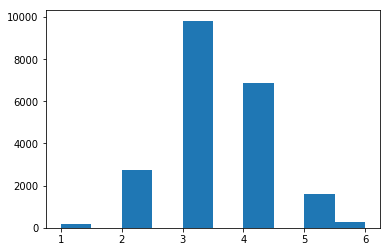

In [23]:
plt.hist(raw_data['bedrooms'],range=(1,6));

# What to do with the columns that have null values?
waterfront: A: there are only 146 records on the waterfront. I think we can drop this column
view: A: drop this as I don't think this helps. If we convert the nulls to zero, it doesn't seem to affect the value of the column much. Before cleaning, there are only 5,036 records that have view out of ~21,600
yr_renovated: A: I think we can convert year renovated to the yr_built value if it is null and then make a new column called age_since_upgrade

Erin: What if you looked at sqftliving/ rooms?

In [47]:
view_nan_dropped = raw_data.dropna(axis='rows', subset=['view', 'price'])
view_nan_dropped

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,NaN,0.0,...,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925


In [49]:
only_view_and_price = view_nan_dropped.filter(['view', 'price'], axis=1)
only_view_and_price

,view,price
0,0.0,221900.0
1,0.0,538000.0
2,0.0,180000.0
3,0.0,604000.0
4,0.0,510000.0
5,0.0,1230000.0
6,0.0,257500.0
8,0.0,229500.0
9,0.0,323000.0
10,0.0,662500.0


In [50]:
only_view_and_price.corr()['price'].sort_values(ascending=False)

price    1.000000
view     0.395734
Name: price, dtype: float64

This is a surprisingly high correlation. We were expecting no correlation

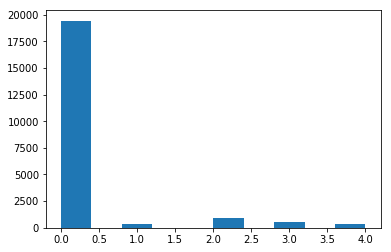

In [52]:
plt.hist(only_view_and_price['view']);

In [54]:
only_4_views = raw_data.loc[raw_data['view'] == 4]

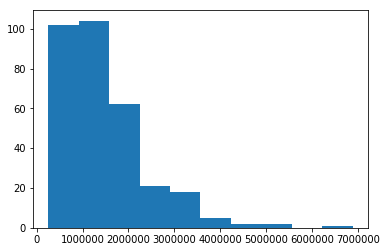

In [55]:
plt.hist(only_4_views['price']);

In [58]:
only_4_views['price'].describe()

count    3.170000e+02
mean     1.452466e+06
std      9.307477e+05
min      2.520000e+05
25%      8.150000e+05
50%      1.180000e+06
75%      1.850000e+06
max      6.890000e+06
Name: price, dtype: float64

I think the view data should be dropped as using it would break one of the assumptions of linear regression. Linear regression assumes that all the independent variables follow a normal distribution, but View is so heavily skewed right(?) that it should not be considered a normal distribution. Almost 20k of the 21k records have 0 views.


Dirk: These are actually categorical 

In [59]:
raw_data['waterfront'].describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

//anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


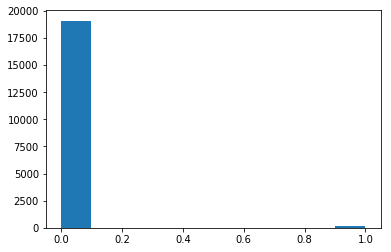

In [61]:
plt.hist(raw_data['waterfront']);

A similar logic should be followed for Waterfront. There are only 146 records with a waterfront with ~3000 nan values. Even if the NaN values were replaced with 1, this would result in a bimodel distribution, not a normal one.

Not enough values with a weak correlation

Since we are looking at prices, the unique IDs should not be relevant for our model. That colummn should also be dropped.

In [63]:
wf_nan_dropped = raw_data.dropna(axis='rows', subset=['waterfront', 'price'])
only_wf_and_price = wf_nan_dropped.filter(['waterfront', 'price'], axis=1)
only_wf_and_price.corr()['price'].sort_values(ascending=False)

price         1.000000
waterfront    0.276295
Name: price, dtype: float64

In [64]:
wf_replace_na_with_0 = raw_data.fillna(0)
only_wf_no_nan_and_price = wf_replace_na_with_0.filter(['waterfront', 'price'], axis=1)
only_wf_no_nan_and_price.corr()['price'].sort_values(ascending=False)

price         1.000000
waterfront    0.264306
Name: price, dtype: float64

In [65]:
wf_replace_na_with_0['waterfront'].sum()

146.0